In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

#1. Data Collection and Pre-processing
# Load data (replace with your actual file names)
df = pd.read_csv('2. ACTIVE.csv')

# Creating a DataFrame from the numpy array #splitting the dataset
X = df.drop(columns=['SPAD'])  # Drop 'sample_id' and 'SPAD' to get the features
y = df['SPAD']  # Target variable

print(df)
print (X)
print(y )

# Check for missing values
print(df.isnull().sum())


      500.075   500.336   500.597   500.858   501.119   501.381   501.642  \
0   41.300000  4.670000  4.713333  4.766667  4.844444  4.955556  4.988889   
1   40.466667  4.233333  4.276667  4.314444  4.373333  4.466667  4.485556   
2   39.266667  4.024444  4.030000  4.061111  4.112222  4.198889  4.220000   
3   41.633333  4.087778  4.115556  4.157778  4.228889  4.326667  4.356667   
4   40.866667  3.987778  4.033333  4.091111  4.153333  4.244444  4.263333   
..        ...       ...       ...       ...       ...       ...       ...   
94   4.024444  4.035556  4.071111  4.122222  4.173333  4.184444  4.241111   
95   4.853333  4.897778  4.931111  4.956667  5.026667  5.064444  5.123333   
96   4.776667  4.820000  4.865556  4.890000  4.954444  4.984444  5.036667   
97   4.826667  4.865556  4.903333  4.943333  5.003333  5.022222  5.072222   
98   3.932222  3.978889  4.021111  4.054444  4.137778  4.168889  4.181111   

     501.903   502.164   502.425  ...    948.856    949.094    949.333  \
0

In [2]:
#Explore data statistics
df.describe()

500.075    500.336    500.597    500.858    501.119    501.381  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean    7.278681   4.067250   4.094719   4.066027   4.026263   4.054158   
std    10.613304   1.293925   1.283557   1.260243   1.251413   1.262602   
min     1.865000   1.966667   1.990000   1.983333   1.966667   1.976667   
25%     2.905000   2.968333   3.005000   2.996667   2.950000   2.945000   
50%     4.280000   4.233333   4.260000   4.156667   4.133333   4.168889   
75%     4.810000   4.670000   4.715556   4.766667   4.843333   4.856667   
max    41.633333  10.285000  10.320000  10.135000   9.895000   9.965000   

         501.642    501.903    502.164    502.425  ...    948.856    949.094  \
count  99.000000  99.000000  99.000000  99.000000  ...  99.000000  99.000000   
mean    4.133945   4.154804   4.125398   4.137890  ...  29.077357  28.698681   
std     1.260101   1.256499   1.256753   1.253559  ...   8.225681   8.085084   
min     2.073333   2.103333   2.053333   2.043333  ...  15.620000  15.436667   
25%     3.038333   3.071667   3.036667   3.061667  ...  20.113333  19.991667   
50%     4.236667   4.240000   4.200000   4.206667  ...  31.166667  30.423333   
75%     4.883333   4.906667   4.916667   4.937778  ...  33.941111  33.362222   
max    10.115000  10.130000  10.020000  10.020000  ...  53.790000  52.145000   

         949.333    949.571    949.809    950.048    950.286    950.524  \
count  99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   
mean   28.801156  29.075713  28.877177  28.610645  28.587407  28.582104   
std     8.097246   8.162720   8.071068   8.010908   8.031755   8.048162   
min    15.560000  15.703333  15.583333  15.426667  15.333333  15.163333   
25%    20.066667  20.201667  20.166667  20.005000  19.991667  20.018333   
50%    30.613333  31.126667  30.580000  30.313333  30.253333  30.210000   
75%    33.513333  33.926111  33.668889  33.292222  33.338889  33.380000   
max    52.510000  53.465000  52.750000  51.915000  52.015000  52.135000   

         950.763       SPAD  
count  99.000000  99.000000  
mean   28.380898  36.386667  
std     8.039262   4.001184  
min    14.983333  28.200000  
25%    19.848333  33.200000  
50%    29.880000  36.100000  
75%    33.373333  39.815000  
max    51.495000  47.700000  

[8 rows x 1793 columns]

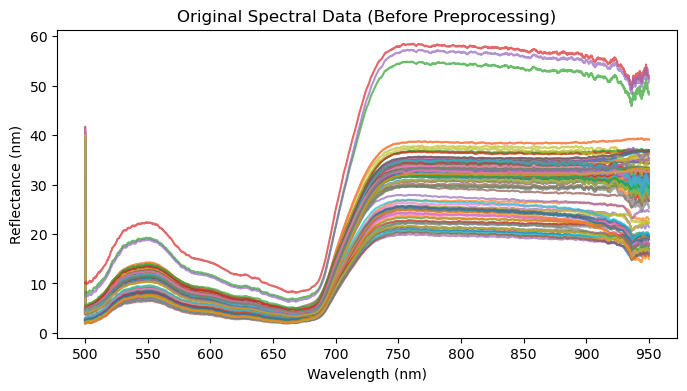

In [3]:
# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_wavelengths = X.shape[1]  # Assuming the number of columns in X corresponds to the number of wavelengths

# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(X.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('Original Spectral Data (Before Preprocessing)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()


In [4]:
# Step 1: Calculate Q1, Q3, and IQR for the spectral data
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Identify outliers in the spectral data
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Step 3: Create a mask to identify rows with any outliers
outlier_mask = outliers.any(axis=1)

# Step 4: Calculate the absolute deviation from the IQR boundaries for ranking
deviation = np.maximum((Q1 - X).abs(), (X - Q3).abs())

# Apply the mask to get deviations only for the identified outliers
deviation = deviation[outlier_mask]

# Step 5: Sum deviations across features for each sample (to rank overall extremeness)
total_deviation = deviation.sum(axis=1)

# Step 6: Calculate the maximum number of outliers to remove (5% of the total data)
num_samples = len(X)
max_outliers_to_remove = int(0.05 * num_samples)

# Get indices of the top 5% most extreme outliers
top_outlier_indices = total_deviation.nlargest(max_outliers_to_remove).index

# Create a new outlier mask based on the top 5% of deviations
final_outlier_mask = pd.Series(False, index=X.index)
final_outlier_mask.loc[top_outlier_indices] = True

# Step 7: Remove the top 5% most extreme outliers
cleaned_spectral_data = X[~final_outlier_mask]
cleaned_spad_data = y[~final_outlier_mask]

# Step 8: Combine the cleaned spectral data and SPAD values back into a single DataFrame (if needed)
cleaned_df = pd.concat([cleaned_spectral_data, cleaned_spad_data], axis=1)

# Step 9: Display the results
print(f"Original dataset size: {X.shape[0]}")
print(f"Number of outliers removed: {final_outlier_mask.sum()}")
print(f"Cleaned dataset size: {cleaned_df.shape[0]}")
print(f"Cleaned spectral data size: {cleaned_spectral_data.shape[0]}")

Original dataset size: 99
Number of outliers removed: 4
Cleaned dataset size: 95
Cleaned spectral data size: 95


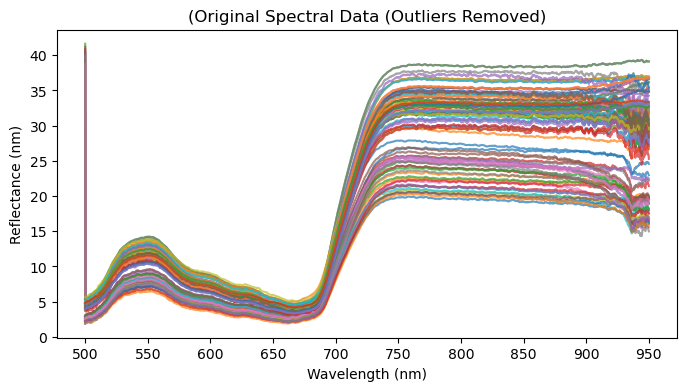

In [5]:
# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_columns = cleaned_spectral_data.shape[1]


# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(cleaned_spectral_data.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('(Original Spectral Data (Outliers Removed)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()

In [6]:
# Step 2: Calculate the correlation matrix for the combined DataFrame
correlation_matrix = cleaned_df.corr()

# Step 3: Extract correlations with the SPAD column (assuming the SPAD column is named 'SPAD')
correlations_with_spad = correlation_matrix['SPAD'].drop('SPAD')

# Step 4: Display the correlation values
print("Correlation values with SPAD:")
print(correlations_with_spad)

# Step 5: Sort correlations by absolute value to find strongest relationships
sorted_correlations = correlations_with_spad.abs().sort_values(ascending=False)
print("Top features correlated with SPAD:")
print(sorted_correlations.head(10))

# Step 6: Set a correlation threshold for feature selection
threshold = 0.5
mask = correlations_with_spad.abs() > threshold

# Step 7: Select features with a correlation higher than the threshold
selected_features = correlations_with_spad[mask].index
X_selected = cleaned_spectral_data[selected_features]


Correlation values with SPAD:
500.075    0.383308
500.336    0.599848
500.597    0.606297
500.858    0.626157
501.119    0.649629
             ...   
949.809    0.714091
950.048    0.718616
950.286    0.720691
950.524    0.722983
950.763    0.726853
Name: SPAD, Length: 1792, dtype: float64
Top features correlated with SPAD:
945.278    0.729048
945.517    0.728921
950.763    0.726853
946.232    0.726133
945.755    0.725778
944.323    0.724933
946.471    0.724589
945.994    0.724406
945.039    0.724396
944.562    0.723565
Name: SPAD, dtype: float64


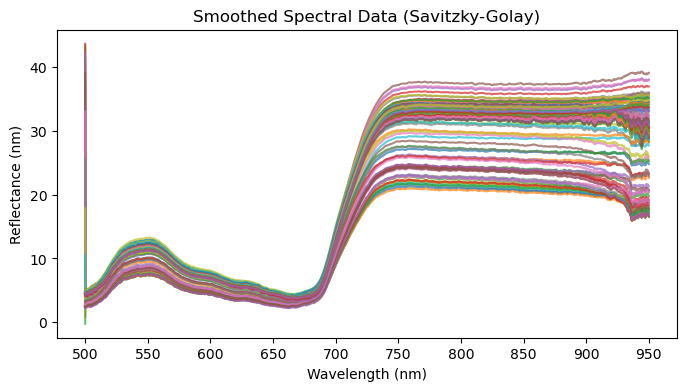

In [7]:
# Function to apply Savitzky-Golay smoothing
def savitzky_golay(cleaned_spectral_data, window_size=11, poly_order=2):
    return savgol_filter(cleaned_spectral_data, window_size, poly_order, axis=0)

# Apply Savitzky-Golay smoothing to X_selected
spectral_sgm = savitzky_golay(cleaned_spectral_data, window_size=11, poly_order=2)

# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_columns = spectral_sgm.shape[1]


# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(spectral_sgm.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('Smoothed Spectral Data (Savitzky-Golay)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()

In [8]:

from scipy.stats import pearsonr

# Function to calculate vegetation indices
def calculate_indices(spectral_sgm, wavelengths):
    """
    Calculate various vegetation indices based on spectral data.

    Parameters:
    spectral_sgm: numpy array (samples x wavelengths)
    wavelengths: numpy array of corresponding wavelengths (same length as spectral_sgm columns)

    Returns:
    indices_df: DataFrame of calculated indices
    """
    # Define wavelength ranges for each band
    green_band = np.mean(spectral_sgm[:, (wavelengths >= 500) & (wavelengths <= 600)], axis=1)
    red_band = np.mean(spectral_sgm[:, (wavelengths >= 600) & (wavelengths <= 700)], axis=1)
    nir_band = np.mean(spectral_sgm[:, (wavelengths >= 750) & (wavelengths <= 950)], axis=1)
    red_edge_band = np.mean(spectral_sgm[:, (wavelengths >= 700) & (wavelengths <= 750)], axis=1)

    # Calculate vegetation indices
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    savi = 1.5 * (nir_band - red_band) / (nir_band + red_band + 0.5)
    msavi = (2 * nir_band + 1 - np.sqrt((2 * nir_band + 1)**2 - 8 * (nir_band - red_band))) / 2
    gndvi = (nir_band - green_band) / (nir_band + green_band)
    rvi = nir_band / red_band
    tvi = 0.5 * (120 * (nir_band - green_band) - 200 * (red_band - green_band))
    rdvi = (nir_band - red_band) / np.sqrt(nir_band + red_band)
    osavi = (nir_band - red_band) / (nir_band + red_band + 0.16)
    sr = nir_band / red_band
    mtvi = 1.5 * ((1.2 * (nir_band - green_band)) - (2.5 * (red_band - green_band)))
    cigreen = (nir_band / green_band) - 1
    msr = (nir_band / red_band - 1) / np.sqrt(nir_band / red_band + 1)
    cire = (nir_band / red_edge_band) - 1
    rev = red_edge_band / nir_band

    # Store all indices in a DataFrame
    indices_df = pd.DataFrame({
        "R": red_band,
        "G": green_band,
        "NIR": nir_band,
        "RedEdge": red_edge_band,
        "NDVI": ndvi,
        "SAVI": savi,
        "MSAVI": msavi,
        "GNDVI": gndvi,
        "RVI": rvi,
        "TVI": tvi,
        "RDVI": rdvi,
        "OSAVI": osavi,
        "SR": sr,
        "MTVI": mtvi,
        "CIgreen": cigreen,
        "MSR": msr,
        "CIre": cire,
        "REV": rev
    })
    return indices_df

# Function to calculate correlation coefficients
def calculate_correlations(indices_df, cleaned_spad_data):
    """
    Calculate correlation coefficients between vegetation indices and cleaned SPAD data.

    Parameters:
    indices_df: DataFrame of vegetation indices
    cleaned_spad_data: numpy array of SPAD values

    Returns:
    correlation_df: DataFrame of correlation coefficients and p-values
    """
    correlations = []
    for index_name in indices_df.columns:
        corr, p_value = pearsonr(indices_df[index_name], cleaned_spad_data)
        correlations.append({"Index": index_name, "Correlation": corr, "P-Value": p_value})
    
    correlation_df = pd.DataFrame(correlations)
    return correlation_df

# Define wavelengths to match the number of columns in spectral_sgm
num_wavelengths = spectral_sgm.shape[1]
wavelengths = np.linspace(500, 950, num_wavelengths)  # Define wavelengths

# Step 1: Calculate vegetation indices
indices_df = calculate_indices(spectral_sgm, wavelengths)

# Step 2: Calculate correlations
cleaned_spad_data = np.array(cleaned_spad_data)  # Assuming SPAD values are in a numpy array
correlation_df = calculate_correlations(indices_df, cleaned_spad_data)

# Step 3: Filter significant correlations
significant_correlations = correlation_df[correlation_df["P-Value"] < 0.05]

# Output results
print("All Correlations:")
print(correlation_df)
print("\nSignificant Correlations:")
print(significant_correlations)


All Correlations:
      Index  Correlation       P-Value
0         R     0.633423  5.636872e-12
1         G     0.621149  1.870122e-11
2       NIR     0.721833  1.540903e-16
3   RedEdge     0.686989  1.509608e-14
4      NDVI     0.433077  1.167874e-05
5      SAVI     0.537682  1.925097e-08
6     MSAVI     0.473413  1.265077e-06
7     GNDVI     0.334030  9.390547e-04
8       RVI     0.431098  1.293180e-05
9       TVI     0.725298  9.401870e-17
10     RDVI     0.741996  7.794335e-18
11    OSAVI     0.469929  1.550350e-06
12       SR     0.431098  1.293180e-05
13     MTVI     0.720201  1.939489e-16
14  CIgreen     0.335961  8.731701e-04
15      MSR     0.431953  1.237590e-05
16     CIre     0.772105  5.191266e-20
17      REV    -0.767752  1.122161e-19

Significant Correlations:
      Index  Correlation       P-Value
0         R     0.633423  5.636872e-12
1         G     0.621149  1.870122e-11
2       NIR     0.721833  1.540903e-16
3   RedEdge     0.686989  1.509608e-14
4      NDVI     0.4

Explained Variance Ratio: [6.03014967e-01 3.71910393e-01 1.67551023e-02 7.91872645e-03
 2.36356218e-04 9.52753962e-05 4.12751850e-05 1.56255796e-05
 8.37916581e-06 3.57672103e-06 2.71762750e-07 3.96821787e-08
 1.00240966e-08 9.93046292e-10 4.00398982e-14 6.00123445e-33
 3.36823299e-33 2.50693828e-39]


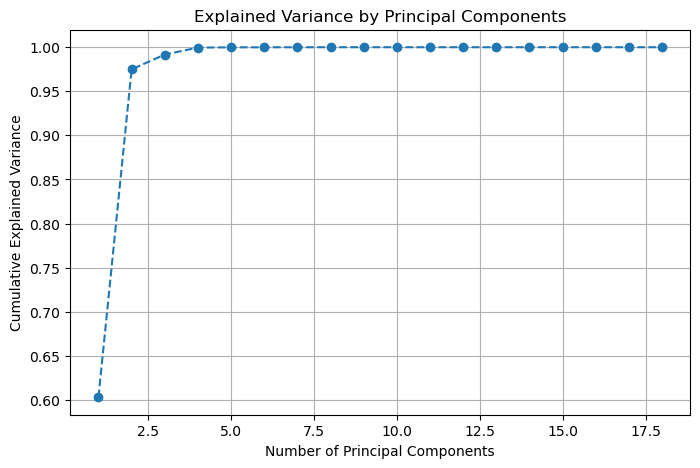

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  7.155860  3.673520 -0.695935 -0.194134  0.276741  0.046676 -0.039705   
1  6.401725  2.384767 -0.589062 -0.181691  0.169125  0.044606 -0.011066   
2  5.711883  1.380440 -0.503632 -0.157816  0.096993  0.035451  0.007090   
3  5.051591  0.625668 -0.434028 -0.131522  0.047684  0.024031  0.015860   
4  4.395381  0.096450 -0.376472 -0.107267  0.013118  0.013606  0.016273   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.027575  0.010541 -0.011926  0.002700  0.000315  0.001712  0.000314   
1 -0.016648 -0.001991 -0.002847  0.001653  0.000016  0.000689  0.000061   
2 -0.010589 -0.008698  0.002286  0.000611 -0.000006  0.000159 -0.000046   
3 -0.006640 -0.011304  0.004503 -0.000225 -0.000004 -0.000112 -0.000069   
4 -0.003232 -0.010972  0.004436 -0.000804 -0.000127 -0.000231 -0.000050   

           PC15          PC16          PC17          PC18  
0  1.657027e-07  1.061003e-16 -1.07355

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
indices_scaled = scaler.fit_transform(indices_df)

# Step 2: Initialize and apply PCA
pca = PCA(n_components=None)  # Set to None to keep all components
pca_result = pca.fit_transform(indices_scaled)

# Step 3: Analyze explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 4: Output results
print("Explained Variance Ratio:", explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Step 5: Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

# Display first few rows of PCA-transformed data
print(pca_df.head())


In [10]:
#from sklearn.decomposition import FastICA
#from sklearn.decomposition import FastICA
#Assume spectral_sgm is your input data after preprocessing
#ica = FastICA(n_components=5, max_iter=500, tol=0.01, random_state=175)

# Apply ICA to the spectral data
#X_ica = ica.fit_transform(spectral_sgm)

# Check the shape of the transformed data
#print(f"Shape of ICA-transformed data: {X_ica.shape}")


In [11]:
# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result,cleaned_spad_data, test_size=0.20, random_state=175)

In [12]:

from scipy.stats import pearsonr
import numpy as np

# Pearson Correlation for Feature Selection
def select_features_pearson(X_train, y_train, threshold=0.1):
    # Calculate Pearson correlation for each feature in X_train with y_train
    correlations = np.array([pearsonr(X_train[:, i], y_train)[0] for i in range(X_train.shape[1])])
    
    # Select indices of features with absolute correlation greater than threshold
    selected_features = np.where(np.abs(correlations) > threshold)[0]
    
    # Return the filtered training set and the indices of selected features
    return X_train[:, selected_features], selected_features

# Apply Pearson Correlation for Feature Selection
threshold = 0.1  # Adjust the threshold as needed
X_train_pearson, selected_features = select_features_pearson(X_train, y_train, threshold)

# Apply the same feature selection to X_test
X_test_pearson = X_test[:, selected_features]

# Output
print(f"Number of features selected by Pearson correlation: {len(selected_features)}")
print("Selected features indices (Pearson):", selected_features)

Number of features selected by Pearson correlation: 9
Selected features indices (Pearson): [ 0  1  2  4  5  6  7  8 13]


In [13]:
# Define parameter grids for RandomizedSearchCV
# Parameter grid for RandomizedSearchCV
n_estimators = np.arange(5, 160, 5)
max_depth = np.arange(5, 50, 3)
min_samples_split = np.arange(4, 50, 5)
min_samples_leaf = np.arange(4, 50,5)
min_impurity_decrease = np.linspace(0, 0.1, 2)
# Adding max_features and min_impurity_decrease to help control complexity
param_dist_rf = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'min_impurity_decrease': min_impurity_decrease,  # Helps reduce overfitting
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
   
}
# Initialize models
model_rf = RandomForestRegressor(random_state=175)

# Perform RandomizedSearchCV for each model
random_search_rf = RandomizedSearchCV(model_rf, param_distributions=param_dist_rf, n_iter=175, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_rf.fit(X_train_pearson, y_train)
best_rf = random_search_rf.best_estimator_
best_params_rf = random_search_rf.best_params_
print("Best parameters for Random Forest: ", best_params_rf)
# Cross-validation with the best hyperparameters for each model
mse_scores_rf = cross_val_score(best_rf, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_rf = -mse_scores_rf
average_mse_rf = np.mean(mse_scores_rf)

# Print cross-validation results
print(f"Average MSE for Random Forest: {average_mse_rf}")

# Evaluate the individual models
models = {
    "RandomForest": best_rf
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


Best parameters for Random Forest:  {'n_estimators': 55, 'min_samples_split': 4, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.0, 'max_features': 'auto', 'max_depth': 47, 'bootstrap': True}
Average MSE for Random Forest: 7.773130918358963
Evaluating RandomForest model...
Training Metrics:
                   MAE       MSE   Pearson        R2      RMSE       RPD
RandomForest  1.203797  2.627288  0.915595  0.825282  1.620891  2.392382

Testing Metrics:
                   MAE       MSE   Pearson        R2      RMSE       RPD
RandomForest  1.534023  3.141703  0.877129  0.766826  1.772485  2.070904


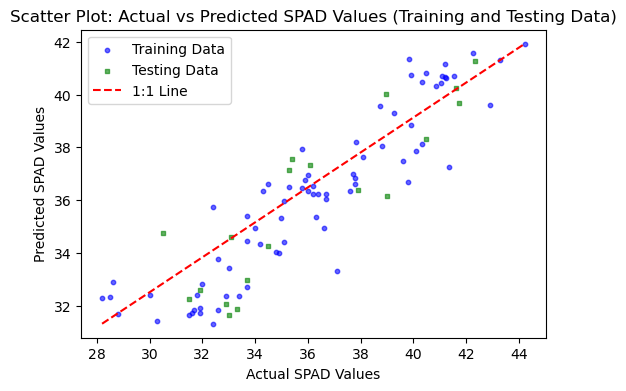

In [14]:
import matplotlib.pyplot as plt

# Assuming these are your actual and predicted SPAD values for both training and testing sets
y_train_actual = y_train # Replace with your actual training SPAD values
y_train_predicted = y_train_pred # Replace with your predicted SPAD values from the model (training)

y_test_actual = y_test  # Replace with your actual testing SPAD values
y_test_predicted = y_test_pred  # Replace with your predicted SPAD values from the model (testing)

# Combined Plot
plt.figure(figsize=(6, 4))

# Scatter plot for Training Data (circles)
plt.scatter(y_train_actual, y_train_predicted, color='blue', alpha=0.6, s=10, marker='o', label='Training Data')

# Scatter plot for Testing Data (squares)
plt.scatter(y_test_actual, y_test_predicted, color='green', alpha=0.6, s=10, marker='s', label='Testing Data')

# Plot the 1:1 line (perfect prediction)
plt.plot([min(min(y_train_actual), min(y_test_actual)), max(max(y_train_actual), max(y_test_actual))],
         [min(min(y_train_predicted), min(y_test_predicted)), max(max(y_train_predicted), max(y_test_predicted))],
         color='red', linestyle='--', label='1:1 Line')

# Labels and title
plt.xlabel('Actual SPAD Values', fontsize=10)
plt.ylabel('Predicted SPAD Values', fontsize=10)
plt.title('Scatter Plot: Actual vs Predicted SPAD Values (Training and Testing Data)', fontsize=12)

# Add legend
plt.legend()

# Remove grid and display plot
plt.show()



In [15]:
# Define parameter grids for RandomizedSearchCV
n_estimators = np.arange(3, 100,1)
learning_rate = np.arange(0.1, 1, 0.2)
max_depth = np.arange(2, 50,3)
subsample = np.arange(0.9, 1.0, 0.5) 
colsample_bytree = np.arange(0.5, 1.0, 0.5)

# Additional hyperparameters to help control model complexity
gamma = np.arange(0, 0.5, 0.05)  # Regularization term to reduce overfitting
reg_lambda = np.arange(0.6, 1.0, 0.6)  # L2 regularization
reg_alpha = np.arange(0.5, 1.0, 0.6)  # L1 regularization

param_dist_xgb = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'gamma': gamma,  # Regularization parameters
    'reg_lambda': reg_lambda,
    'reg_alpha': reg_alpha
}
# Initialize models
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=175)
# Perform RandomizedSearchCV for each model
random_search_xgb = RandomizedSearchCV(model_xgb, param_distributions=param_dist_xgb, n_iter=175, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_xgb.fit(X_train_pearson, y_train)
best_xgb = random_search_xgb.best_estimator_
best_params_xgb = random_search_xgb.best_params_
print("Best parameters for XGBoost: ", best_params_xgb)
# Cross-validation with the best hyperparameters for each model
mse_scores_xgb = cross_val_score(best_xgb, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_xgb = -mse_scores_xgb
average_mse_xgb = np.mean(mse_scores_xgb)
# Print cross-validation results
print(f"Average MSE for XGBoost: {average_mse_xgb}")


# Evaluate the individual models
models = {
      "XGBoost": best_xgb
}

# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


Best parameters for XGBoost:  {'subsample': 0.9, 'reg_lambda': 0.6, 'reg_alpha': 0.5, 'n_estimators': 24, 'max_depth': 26, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.5}
Average MSE for XGBoost: 8.502749011301422
Evaluating XGBoost model...
Training Metrics:
              MAE       MSE   Pearson       R2      RMSE       RPD
XGBoost  0.607311  0.671107  0.992532  0.95537  0.819211  4.733567

Testing Metrics:
             MAE       MSE   Pearson       R2      RMSE       RPD
XGBoost  1.75655  4.623207  0.828064  0.65687  2.150165  1.707147


In [16]:
# Define parameter grids for RandomizedSearchCV
n_estimators = np.arange(2,100,3)
learning_rate = np.arange(0.01, 1, 0.09)
max_depth = np.arange(2, 40,3)

param_dist_gb = {
   'n_estimators': n_estimators,
   'learning_rate': learning_rate,
   'max_depth': max_depth
}

# Initialize models
model_gb = GradientBoostingRegressor(random_state=175)

# Perform RandomizedSearchCV for each model
random_search_gb = RandomizedSearchCV(model_gb, param_distributions=param_dist_gb, n_iter=48, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_gb.fit(X_train_pearson, y_train)
best_gb = random_search_gb.best_estimator_
best_params_gb = random_search_gb.best_params_
print("Best parameters for Gradient Boosting: ", best_params_gb)
# Cross-validation with the best hyperparameters for each model
mse_scores_gb = cross_val_score(best_gb, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_gb = -mse_scores_gb
average_mse_gb = np.mean(mse_scores_gb)
# Print cross-validation results
print(f"Average MSE for Gradient Boosting: {average_mse_gb}")
# Evaluate the individual models
models = {
    "GradientBoosting": best_gb
    }
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)


Best parameters for Gradient Boosting:  {'n_estimators': 20, 'max_depth': 2, 'learning_rate': 0.19}
Average MSE for Gradient Boosting: 8.597458590697327
Evaluating GradientBoosting model...
Training Metrics:
                      MAE       MSE   Pearson        R2      RMSE     RPD
GradientBoosting  1.04846  1.715806  0.952923  0.885896  1.309888  2.9604

Testing Metrics:
                       MAE       MSE   Pearson        R2      RMSE       RPD
GradientBoosting  1.373687  3.029665  0.890069  0.775141  1.740593  2.108848


In [17]:
# Define parameter grids for RandomizedSearchCV
C = np.arange(0.3, 3, 0.2)
epsilon = np.arange(1,150, 6)

param_dist_svr = {
    'C': C,
    'epsilon': epsilon,
    'kernel': ['linear', 'rbf']
}
# Initialize models
model_svr = SVR()
# Perform RandomizedSearchCV for each model
random_search_svr = RandomizedSearchCV(model_svr, param_distributions=param_dist_svr, n_iter=150, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_svr.fit(X_train_pearson, y_train)
best_svr = random_search_svr.best_estimator_
best_params_svr = random_search_svr.best_params_
print("Best parameters for SVR: ", best_params_svr)
# Cross-validation with the best hyperparameters for each model
mse_scores_svr = cross_val_score(best_svr, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_svr = -mse_scores_svr
average_mse_svr = np.mean(mse_scores_svr)
# Print cross-validation results
print(f"Average MSE for SVR: {average_mse_svr}")
# Evaluate the individual models
models = {
    "SVR": best_svr
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Best parameters for SVR:  {'kernel': 'linear', 'epsilon': 1, 'C': 1.9000000000000001}
Average MSE for SVR: 6.3157789379841205
Evaluating SVR model...
Training Metrics:
          MAE       MSE   Pearson        R2      RMSE       RPD
SVR  1.857058  5.741818  0.787013  0.618161  2.396209  1.618302

Testing Metrics:
          MAE       MSE   Pearson        R2      RMSE       RPD
SVR  1.168304  1.775227  0.941436  0.868245  1.332376  2.754962


In [18]:
# Define parameter grids for RandomizedSearchCV
alpha = np.logspace(-5, 100, 1)  # Range from 0.001 to 100
l1_ratio = np.linspace(0.1, 1, 50)  # More granular search for l1 ratio

param_dist_elnet = {
    'alpha': alpha,
    'l1_ratio': l1_ratio
}
# Initialize models
model_elnet = ElasticNet(random_state=175) 
# Perform RandomizedSearchCV for each model
random_search_elnet = RandomizedSearchCV(model_elnet, param_distributions=param_dist_elnet, n_iter=25, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_elnet.fit(X_train_pearson, y_train)
best_elnet = random_search_elnet.best_estimator_
best_params_elnet = random_search_elnet.best_params_
print("Best parameters for Elastic Net: ", best_params_elnet)
# Cross-validation with the best hyperparameters for each model
mse_scores_elnet = cross_val_score(best_elnet, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_elnet = -mse_scores_elnet
average_mse_elnet = np.mean(mse_scores_elnet)
# Print cross-validation results
print(f"Average MSE for Elastic Net: {average_mse_elnet}")
# Evaluate the individual models
models = {
    "ElasticNet": best_elnet
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Best parameters for Elastic Net:  {'l1_ratio': 0.1, 'alpha': 1e-05}
Average MSE for Elastic Net: 6.72973919149302
Evaluating ElasticNet model...
Training Metrics:
                 MAE       MSE   Pearson        R2      RMSE       RPD
ElasticNet  1.579524  4.299322  0.845046  0.714089  2.073481  1.870184

Testing Metrics:
                 MAE       MSE   Pearson        R2     RMSE       RPD
ElasticNet  1.160826  1.736781  0.934514  0.871098  1.31787  2.785288


In [19]:
# Define parameter grids for RandomizedSearchCV

# Initialize models
model_plsr = PLSRegression(n_components=1) 

# Perform RandomizedSearchCV for each model
# PLSR does not require hyperparameter tuning here
best_plsr = model_plsr
best_plsr.fit(X_train_pearson, y_train)
# Cross-validation with the best hyperparameters for each model

mse_scores_plsr = cross_val_score(best_plsr, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)
# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_plsr = -mse_scores_plsr
average_mse_plsr = np.mean(mse_scores_plsr)
# Print cross-validation results
print(f"Average MSE for PLSR: {average_mse_plsr}")
# Evaluate the individual models
models = {
    "PLSR": best_plsr
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Average MSE for PLSR: 6.950008395483641
Evaluating PLSR model...
Training Metrics:
           MAE       MSE   Pearson        R2      RMSE       RPD
PLSR  1.618569  4.489902  0.837505  0.701415  2.118939  1.830063

Testing Metrics:
           MAE       MSE   Pearson        R2      RMSE       RPD
PLSR  1.319741  2.411036  0.927723  0.821055  1.552751  2.363963


In [20]:
# Ensemble the models using Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('gb', best_gb),
    ('svr', best_svr),
    ('elnet', best_elnet)
])

ensemble_model.fit(X_train_pearson, y_train)
y_ensemble_pred = ensemble_model.predict(X_test_pearson)

# Evaluate the ensemble model
ensemble_metrics_train = calculate_metrics(y_train, ensemble_model.predict(X_train_pearson))
ensemble_metrics_test = calculate_metrics(y_test, y_ensemble_pred)
print("\nEnsemble Model Training Metrics:")
print(pd.DataFrame(ensemble_metrics_train, index=["Ensemble"]).T)
print("\nEnsemble Model Testing Metrics:")
print(pd.DataFrame(ensemble_metrics_test, index=["Ensemble"]).T)


Ensemble Model Training Metrics:
         Ensemble
MSE      2.390937
RMSE     1.546265
MAE      1.203739
R2       0.840999
RPD      2.507843
Pearson  0.928580

Ensemble Model Testing Metrics:
         Ensemble
MSE      2.127271
RMSE     1.458517
MAE      1.312566
R2       0.842116
RPD      2.516698
Pearson  0.922998


In [21]:
# Ensemble the models using Voting Regressor # 2 the best model ensembled
ensemble_model = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb)
])

ensemble_model.fit(X_train_pearson, y_train)
y_ensemble_pred = ensemble_model.predict(X_test_pearson)

# Evaluate the ensemble model
ensemble_metrics_train = calculate_metrics(y_train, ensemble_model.predict(X_train_pearson))
ensemble_metrics_test = calculate_metrics(y_test, y_ensemble_pred)
print("\nEnsemble Model Training Metrics:")
print(pd.DataFrame(ensemble_metrics_train, index=["Ensemble"]).T)
print("\nEnsemble Model Testing Metrics:")
print(pd.DataFrame(ensemble_metrics_test, index=["Ensemble"]).T)


Ensemble Model Training Metrics:
         Ensemble
MSE      1.393550
RMSE     1.180487
MAE      0.877488
R2       0.907327
RPD      3.284907
Pearson  0.967017

Ensemble Model Testing Metrics:
         Ensemble
MSE      3.691573
RMSE     1.921347
MAE      1.645286
R2       0.726015
RPD      1.910455
Pearson  0.860294
